# Problem Statement : Build machine learning model that can predict insurance charges based on different features like age,sex,bmi,smoker etc.

# Import required libraries

In [1]:
import pandas as pd  # For data analysis
import numpy as np  # For data analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline
import seaborn as sns  # For data visualization
from sklearn.linear_model import LinearRegression # For regression in machine learning
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error  # For accuracy,mean squared error,mean absolute error
from sklearn.model_selection import train_test_split  # For separating training and testing data

# Setting Path

In [2]:
cd C:\Data Science Docs\Python Docs\Python ML Projects\Project 3

C:\Data Science Docs\Python Docs\Python ML Projects\Project 3


# Data Exploration and Pre Processing

Load the given dataset

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Display a scatter plot between age and children

Text(0.5, 1.0, 'Age v/s Children')

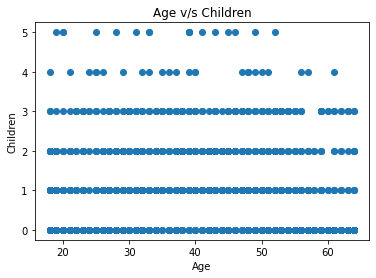

In [7]:
plt.scatter(df['age'],df['children'])
plt.xlabel('Age')
plt.ylabel('Children')
plt.title('Age v/s Children')

Display bar plot between bmi and children

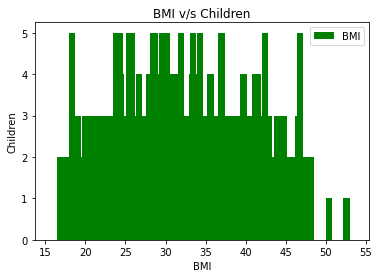

In [8]:
plt.bar(df['bmi'],df['children'],color='Green')
plt.xlabel('BMI')
plt.ylabel('Children')
plt.title('BMI v/s Children')
plt.legend(['BMI'])

# Feature Encoding

Perform encoding to convert character data into numerical data

In [9]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [10]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [11]:
df[['sex','smoker','region']] = df[['sex','smoker','region']].apply(LE.fit_transform)

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Feature Scaling

Perform scaling

In [13]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [14]:
df[['age','bmi']] = SS.fit_transform(df[['age','bmi']])

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,16884.92400
1,-1.509965,1,0.509621,1,0,2,1725.55230
2,-0.797954,1,0.383307,3,0,2,4449.46200
3,-0.441948,1,-1.305531,0,0,1,21984.47061
4,-0.513149,1,-0.292556,0,0,1,3866.85520


# Building the model and check the accuracy

Separate feature data from target data

In [16]:
# Separate feature data
x = df.drop('charges',axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,0,1,3
1,-1.509965,1,0.509621,1,0,2
2,-0.797954,1,0.383307,3,0,2
3,-0.441948,1,-1.305531,0,0,1
4,-0.513149,1,-0.292556,0,0,1


In [17]:
# Separate target data
y = df[['charges']]
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


# Splitting training and testing data

In [18]:
# Split training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [19]:
x_train

,age,sex,bmi,children,smoker,region
161,-1.509965,0,1.014878,0,1,2
1032,-0.655551,0,-0.448399,0,0,0
151,0.626070,1,-0.158040,0,0,2
759,-1.509965,1,1.231417,0,1,2
362,-1.438764,0,-1.470396,0,1,3
...,...,...,...,...,...,...
278,1.409283,1,0.184813,2,0,2
432,0.198863,1,-0.617364,0,0,3
1283,-1.509965,1,-0.103905,1,0,2
1265,1.765289,1,-1.132464,0,1,2


In [20]:
x_test

,age,sex,bmi,children,smoker,region
936,0.341265,1,-0.152298,2,0,0
728,-1.509965,0,1.577551,0,0,0
1307,-0.513149,1,-0.417230,4,1,1
924,0.270064,1,-1.224329,0,0,3
137,-1.225161,1,-0.900341,0,0,1
...,...,...,...,...,...,...
224,0.198863,1,-0.988105,0,1,2
1245,-0.797954,1,-1.043880,5,0,3
1086,1.124479,1,-0.276972,0,0,0
912,1.409283,0,-0.650994,3,0,1


In [21]:
y_train

,charges
161,36149.48350
1032,4137.52270
151,7789.63500
759,36307.79830
362,13844.50600
...,...
278,12928.79110
432,5969.72300
1283,1720.35370
1265,26926.51440


In [22]:
y_test

,charges
936,32108.66282
728,2217.60120
1307,21472.47880
924,6250.43500
137,2045.68525
...,...
224,19515.54160
1245,5615.36900
1086,10796.35025
912,14382.70905


Create a Linear regression model between Features and target data

In [23]:
LR = LinearRegression()

In [24]:
LR.fit(x_train,y_train)

LinearRegression()

Display the test score and training score

In [25]:
# Accuracy for training data set
LR.score(x_train,y_train)

0.7604261748179022

In [26]:
# Accuracy for testing data set
LR.score(x_test,y_test)

0.7096380405273461

Extract slope and intercept value from the model

In [27]:
print("Slope :",LR.coef_,"\nIntercept :",LR.intercept_)

Slope : [[ 3683.41489044   -58.25976836  2050.74527344   407.98188941
  23840.06610383  -201.71936286]] 
Intercept : [8255.9754763]


Display Mean Squared Error

In [28]:
y_pred = LR.predict(x_test)
y_pred

array([[ 9958.37671059],
       [ 5929.3008168 ],
       [30722.21722942],
       [ 6076.52947368],
       [ 1636.85073739],
       [ 1987.40954363],
       [ 2904.94825198],
       [17669.79291291],
       [ 9041.21729922],
       [32851.7112547 ],
       [ 9395.70001923],
       [11289.37439638],
       [ 9059.77080294],
       [ 3333.25526849],
       [ 4557.056335  ],
       [ 3059.08463449],
       [ 7171.58513028],
       [12117.53074454],
       [ 3532.35504066],
       [11906.94020978],
       [10081.57288092],
       [ 5491.13692331],
       [13314.26489975],
       [11928.59105559],
       [28365.24912734],
       [  345.08482203],
       [13722.51274797],
       [13291.77430449],
       [ 7477.16673699],
       [12664.0533694 ],
       [ 8140.75549852],
       [ 4599.08954089],
       [32837.83579473],
       [35967.93775839],
       [ 9036.29090184],
       [ 5665.72528806],
       [ 6986.9758359 ],
       [ 9748.77091036],
       [ 7543.89066157],
       [39993.1799766 ],


In [29]:
y_test

,charges
936,32108.66282
728,2217.60120
1307,21472.47880
924,6250.43500
137,2045.68525
...,...
224,19515.54160
1245,5615.36900
1086,10796.35025
912,14382.70905


In [30]:
# Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
MSE

41815438.342614286

Display Mean Absolute Error

In [31]:
# Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred)
MAE

4318.311308833639

Display Root mean Squared error

In [32]:
# Root Mean Squared Error
np.sqrt(MSE)
# or
# mean_squared_error(MSE) ** (1/2)

6466.485779974644

Display R2 score

In [33]:
# R2 Score
r2_score(y_test,y_pred)

0.7096380405273461